#Energy Efficiency Prediction
###Problem Statement:

> The effect of eight input variables (relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, glazing area distribution) on two output variables, namely heating load (HL) and cooling load (CL), of residential buildings is investigated using a statistical machine learning framework. 

> We have to use a number of classical and non-parametric statistical analytic tools to carefully analyze the strength of each input variable's correlation with each of the output variables in order to discover the most strongly associated input variables.
 
> We need to estimate HL and CL, we can compare a traditional linear regression approach to a sophisticated state-of-the-art nonlinear non-parametric method, random forests.

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [260]:
train_data = pd.read_csv('/content/ENB2012_data.csv')

In [261]:
train_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [262]:
train_data.columns= ["Relative Compactness", "Surface Area", "Wall Area", "Roof Area", "Overall Height", "Orientation", 
               "Glazing Area", "Glazing Area Distribution", "Heating Load", "Cooling Load"]

In [263]:
train_data.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [264]:
train_data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [265]:
train_data.shape

(768, 10)

In [266]:
train_data.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [267]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


##Exploratory Data Analysis

###Distribution of the Features

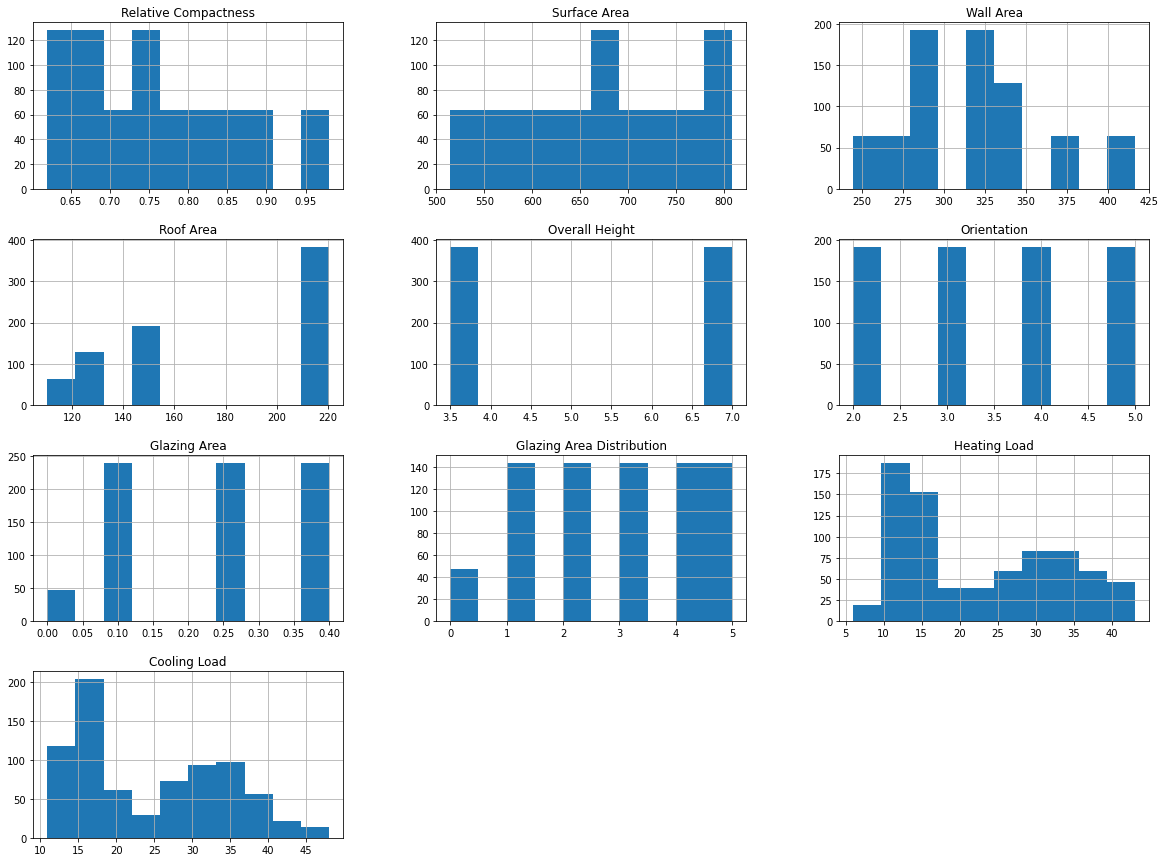

In [268]:
train_data.hist(figsize=(20,15))
plt.show()

### Feature vs Target plots

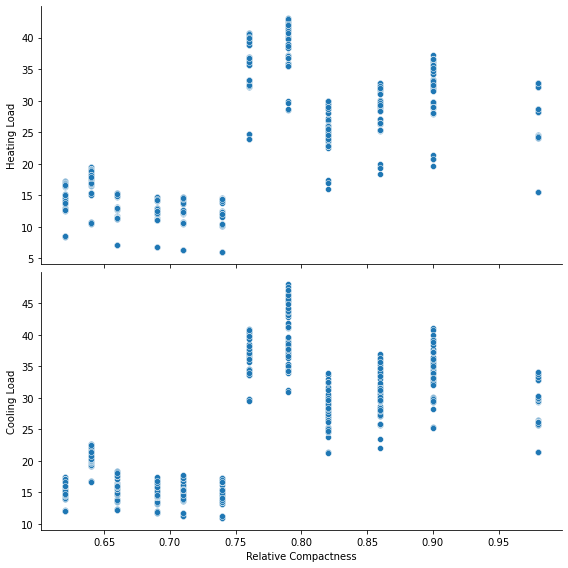

In [269]:
sns.pairplot(train_data, x_vars=["Relative Compactness"], y_vars=["Heating Load", "Cooling Load"], height=4, aspect=2)

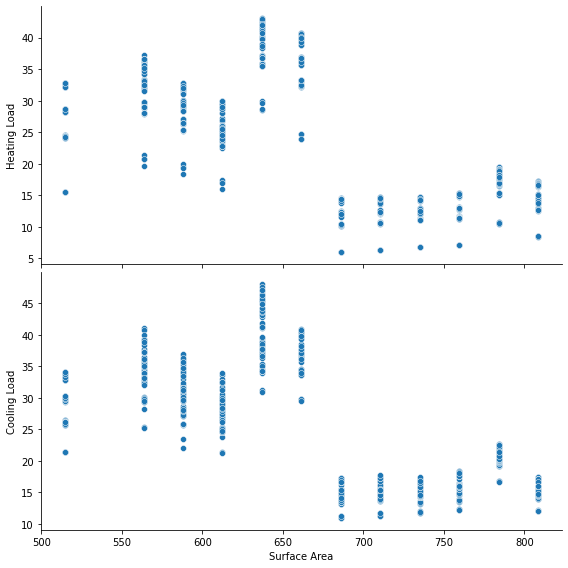

In [270]:
sns.pairplot(train_data,
    x_vars=["Surface Area"],
    y_vars=["Heating Load", "Cooling Load"],
    height=4, aspect=2
)

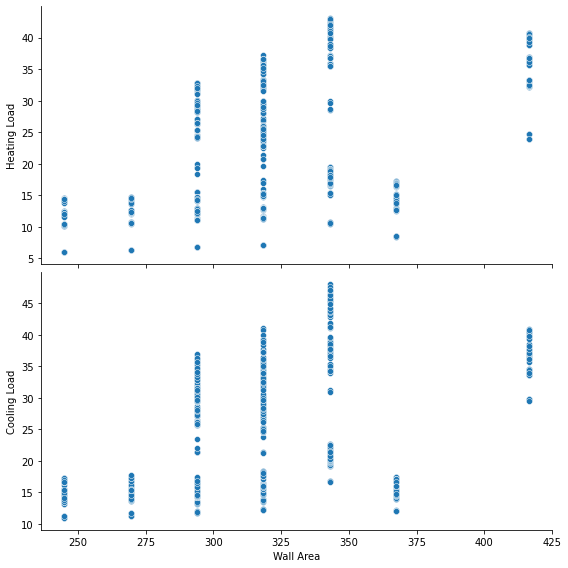

In [271]:
sns.pairplot(train_data,
    x_vars=["Wall Area"],
    y_vars=["Heating Load", "Cooling Load"],
    height=4, aspect=2
)

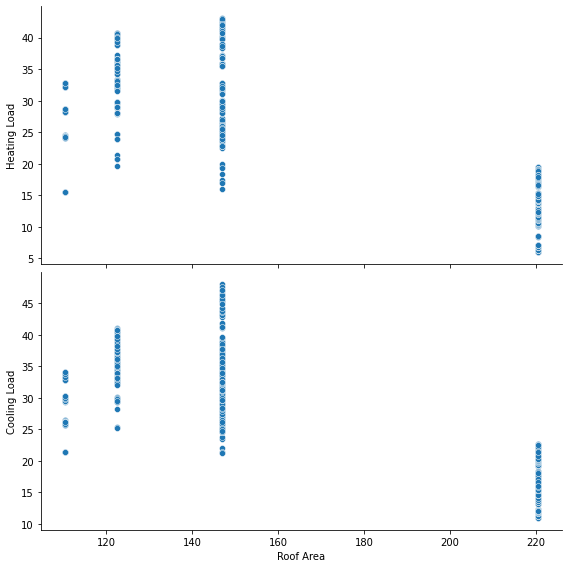

In [272]:
sns.pairplot(train_data,
    x_vars=["Roof Area"],
    y_vars=["Heating Load", "Cooling Load"],
    height=4, aspect=2
)

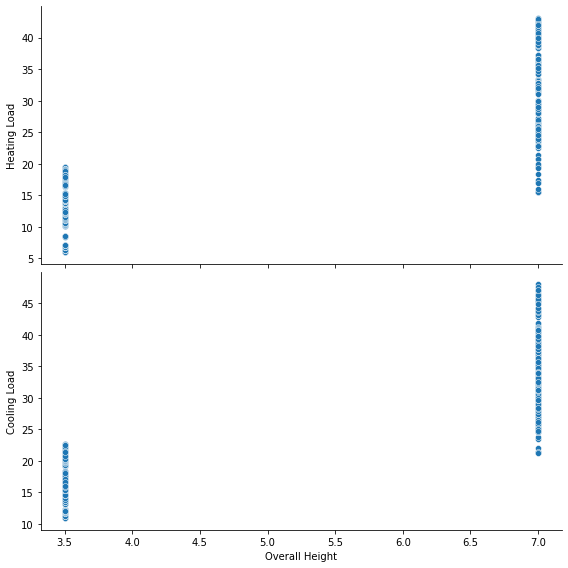

In [273]:
sns.pairplot(train_data,
    x_vars=["Overall Height"],
    y_vars=["Heating Load", "Cooling Load"],
    height=4, aspect=2
)

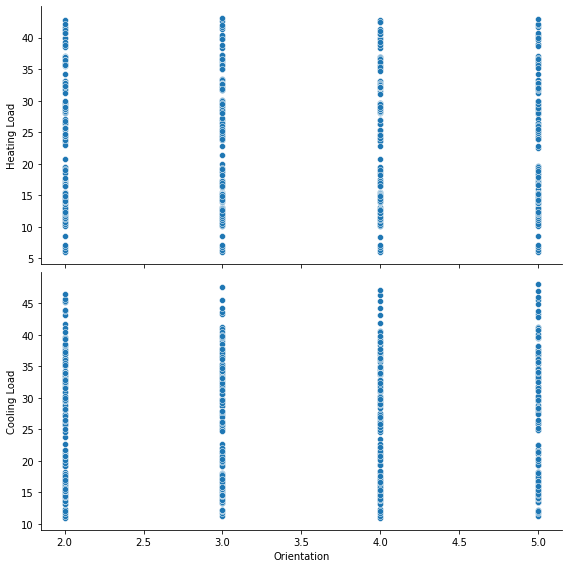

In [274]:
sns.pairplot(train_data,
    x_vars=["Orientation"],
    y_vars=["Heating Load", "Cooling Load"],
    height=4, aspect=2
)

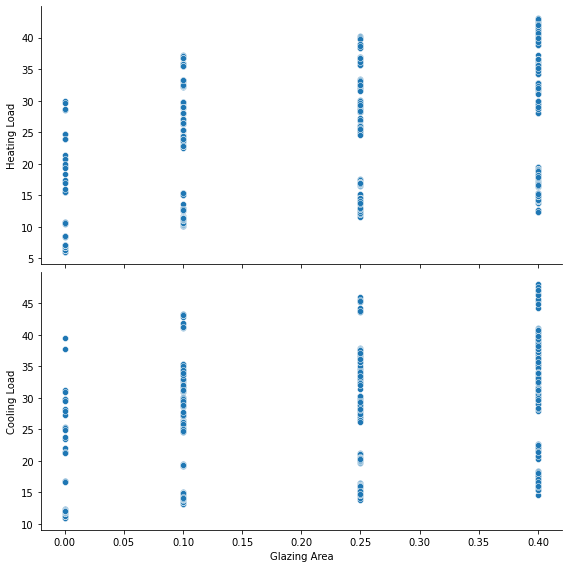

In [275]:
sns.pairplot(train_data,
    x_vars=["Glazing Area"],
    y_vars=["Heating Load", "Cooling Load"],
    height=4, aspect=2
)

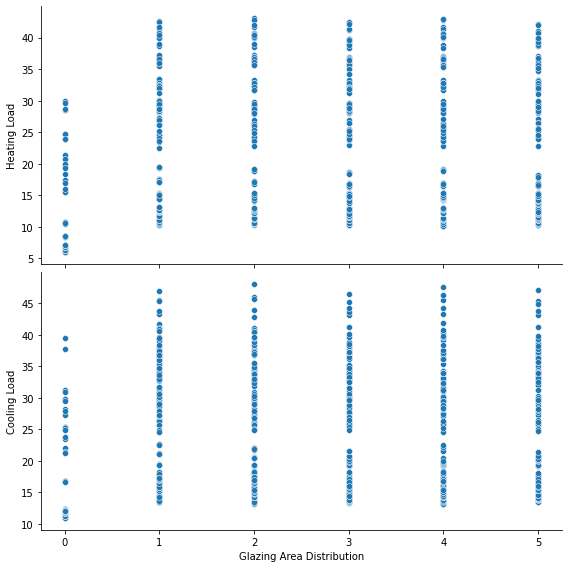

In [276]:
sns.pairplot(train_data,
    x_vars=["Glazing Area Distribution"],
    y_vars=["Heating Load", "Cooling Load"],
    height=4, aspect=2
)

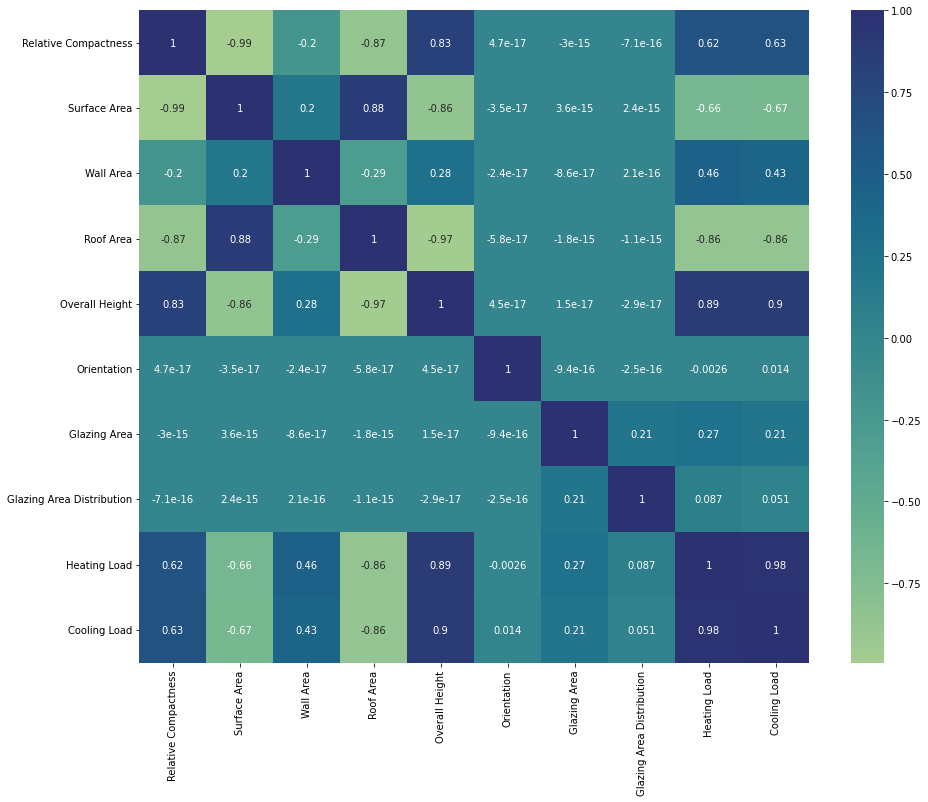

In [277]:
plt.subplots(figsize=(15,12))
corr = train_data.corr()
sns.heatmap(corr, annot=True,cmap="crest")

###From the above graphs, we can infer that,

1. **There is linear relationship between most of the features and target variables**

2. **'Orientation' Feature has no relationship with either of "Heating Load" or "Cooling Load" and can be removed from the data**

###Dropping "Orientation" Feature from the data

In [278]:
train_data = train_data.drop(columns = ["Orientation"])

In [279]:
train_data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48,16.61


##Dataset for predicting "Heating Load"

In [280]:
data_heat = train_data.drop(columns=['Cooling Load'])

In [281]:
data_heat.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84


In [282]:
X = data_heat.drop(columns=['Heating Load'])
Y = data_heat['Heating Load']

In [283]:
Y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating Load, dtype: float64

###Feature Importance for Heating Load using RandomForestRegressor

In [284]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X,Y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Surface Area,0.448684
Roof Area,0.271578
Relative Compactness,0.091375
Glazing Area,0.075214
Overall Height,0.055880
Wall Area,0.043432
Glazing Area Distribution,0.013837


In [285]:
X_train_heat, X_test_heat, Y_train_heat, Y_test_heat = train_test_split(X, Y, test_size=0.2, random_state=42)

In [286]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_heat)
X_test = scaler.transform(X_test_heat)

###Linear Regression

In [287]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression().fit(X_train, Y_train_heat)
Y_predict = lr.predict(X_train)
mean_squared_error(Y_train_heat, Y_predict)

8.441889970989413

In [288]:
Y_predict_test = lr.predict(X_test)
round(mean_squared_error(Y_test_heat, Y_predict_test),2)

9.24

In [289]:
print('R^2 score for Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train, Y_train_heat)))
print('R^2 score for Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test, Y_test_heat)))

R^2 score for Linear Regression on training set: 0.92
R^2 score for Linear Regression on test set: 0.91


In [290]:
print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-2.22605276e+01  9.28166943e+14 -5.41430717e+14 -6.96125207e+14
  1.46875000e+01  8.06835938e+00  9.24133301e-01]
lr.intercept_: 154694490499024.56


##SVM Regressor

In [291]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train, Y_train_heat)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [292]:
svr = SVR(C=100, epsilon=1).fit(X_train, Y_train_heat)
print('R^2 score for SVM Regressor on training set: {:.2f}'
     .format(svr.score(X_train, Y_train_heat)))
print('R^2 score for SVM Regressor on test set: {:.2f}'
     .format(svr.score(X_test, Y_test_heat)))

R^2 score for SVM Regressor on training set: 0.99
R^2 score for SVM Regressor on test set: 0.98


In [293]:
Y_predict_test = svr.predict(X_test)
round(mean_squared_error(Y_test_heat, Y_predict_test),2)

1.67

##KNN Regressor

In [294]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train, Y_train_heat)
grid_search.best_params_

{'n_neighbors': 2}

In [295]:
knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, Y_train_heat)
print('R^2 score for KNN Regressor on training set: {:.2f}'
     .format(knn.score(X_train, Y_train_heat)))
print('R^2 score for KNN Regressor on test set: {:.2f}'
     .format(knn.score(X_test, Y_test_heat)))

R^2 score for KNN Regressor on training set: 1.00
R^2 score for KNN Regressor on test set: 0.94


In [296]:
Y_predict_test = knn.predict(X_test)
round(mean_squared_error(Y_test_heat, Y_predict_test),2)

5.74

##Decision Tree Regressor

In [297]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train,Y_train_heat)
grid_search.best_params_

{'max_depth': 8}

In [298]:
dt = DecisionTreeRegressor(max_depth=8).fit(X_train, Y_train_heat)
print('R^2 score for DT Regressor on training set: {}'
     .format(dt.score(X_train, Y_train_heat)))
print('R^2 score for DT Regressor on test set: {}'
     .format(dt.score(X_test, Y_test_heat)))

R^2 score for DT Regressor on training set: 0.9988038142334548
R^2 score for DT Regressor on test set: 0.9971665520913032


In [299]:
Y_predict_test = dt.predict(X_test)
round(mean_squared_error(Y_test_heat, Y_predict_test),2)

0.3

##Random Forest Regressor

In [300]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor(random_state=10)
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train, Y_train_heat)
grid_search.best_params_

{'max_depth': 6, 'max_features': 4, 'max_leaf_nodes': 8}

In [301]:
rf = RandomForestRegressor(max_depth= 6, max_features=4, max_leaf_nodes=8, random_state=10).fit(X_train, Y_train_heat)
print('R^2 score for RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train, Y_train_heat)))
print('R^2 score for Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test, Y_test_heat)))

R^2 score for RF Regressor on training set: 0.97
R^2 score for Rf Regressor on test set: 0.96


In [302]:
Y_predict_test = rf.predict(X_test)
round(mean_squared_error(Y_test_heat, Y_predict_test),2)

4.44

##**Summary of R- Square Scores for test set for different Regression Models on Heating Load**

In [303]:
from tabulate import tabulate
table = [['S.No', 'Regression Model', 'R^2 Score', 'Mean Squared Error'], [1, 'DecisionTree Regressor', 0.997, 0.3], [2, 'SVM Regressor', 0.98, 1.67], [3, 'RandomForestRegressor', 0.96, 4.44], [4, 'KNN Regressor', 0.94, 5.74], [5, 'Linear Regression', 0.91, 9.24]]

In [304]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤════════════════════════╤═════════════╤══════════════════════╕
│   S.No │ Regression Model       │   R^2 Score │   Mean Squared Error │
╞════════╪════════════════════════╪═════════════╪══════════════════════╡
│      1 │ DecisionTree Regressor │       0.997 │                 0.3  │
├────────┼────────────────────────┼─────────────┼──────────────────────┤
│      2 │ SVM Regressor          │       0.98  │                 1.67 │
├────────┼────────────────────────┼─────────────┼──────────────────────┤
│      3 │ RandomForestRegressor  │       0.96  │                 4.44 │
├────────┼────────────────────────┼─────────────┼──────────────────────┤
│      4 │ KNN Regressor          │       0.94  │                 5.74 │
├────────┼────────────────────────┼─────────────┼──────────────────────┤
│      5 │ Linear Regression      │       0.91  │                 9.24 │
╘════════╧════════════════════════╧═════════════╧══════════════════════╛


###Best Regression Model for Heating Load: **DecisionTree Regressor** with **R^2 = 0.997** and **Mean Squared Error = 0.3**

##Dataset for predicting "Cooling Load"

In [305]:
data_cool = train_data.drop(columns=['Heating Load'])

In [306]:
data_cool.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Glazing Area,Glazing Area Distribution,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,0.0,0,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,28.28


In [307]:
X_C = data_cool.drop(columns=['Cooling Load'])
Y_C = data_cool['Cooling Load']

In [308]:
Y_C.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling Load, dtype: float64

###Feature Importance for Cooling Load using RandomForestRegressor

In [309]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_C,Y_C)
feature_imp = pd.DataFrame(clf.feature_importances_,index=X_C.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
Relative Compactness,0.490518
Overall Height,0.229921
Surface Area,0.116315
Roof Area,0.060974
Glazing Area,0.048367
Wall Area,0.043903
Glazing Area Distribution,0.010002


In [310]:
X_train_cool, X_test_cool, Y_train_cool, Y_test_cool = train_test_split(X_C, Y_C, test_size=0.2, random_state=42)

In [311]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train2 = scaler.fit_transform(X_train_cool)
X_test2 = scaler.transform(X_test_cool)

###Linear Regression

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression().fit(X_train2, Y_train_cool)
Y_predict2 = lr.predict(X_train2)
round(mean_squared_error(Y_train_cool, Y_predict2),2)

10.28

In [313]:
Y_predict_test2 = lr.predict(X_test2)
round(mean_squared_error(Y_test_cool, Y_predict_test2),2)

9.98

In [314]:
print('R^2 score for Linear Regression on training set: {:.2f}'
     .format(lr.score(X_train, Y_train_cool)))
print('R^2 score for Linear Regression on test set: {:.2f}'
     .format(lr.score(X_test, Y_test_cool)))

R^2 score for Linear Regression on training set: 0.89
R^2 score for Linear Regression on test set: 0.89


In [315]:
print("lr.coef_: {}".format(lr.coef_))

print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-2.56140531e+01  4.15697588e+14 -2.42490260e+14 -3.11773191e+14
  1.42187500e+01  5.94458008e+00  1.82037354e-01]
lr.intercept_: 69282931333022.48


###SVM Regressor

In [316]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1,10,100], 'epsilon': [0.01,0.1,1,10,100]}
svr = SVR()
grid_search = GridSearchCV(svr,param_grid,cv=5)
grid_search.fit(X_train2, Y_train_cool)
grid_search.best_params_

{'C': 100, 'epsilon': 1}

In [317]:
svr = SVR(C=100, epsilon=1).fit(X_train2, Y_train_cool)
print('R^2 score for SVM Regressor on training set: {:.2f}'
     .format(svr.score(X_train2, Y_train_cool)))
print('R^2 score for SVM Regressor on test set: {:.2f}'
     .format(svr.score(X_test2, Y_test_cool)))

R^2 score for SVM Regressor on training set: 0.95
R^2 score for SVM Regressor on test set: 0.94


In [318]:
Y_predict_test2 = svr.predict(X_test2)
round(mean_squared_error(Y_test_cool, Y_predict_test2),2)

5.68

###KNN Regressor

In [319]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors': [2,4,6,8,10,12]}
knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train2, Y_train_cool)
grid_search.best_params_

{'n_neighbors': 2}

In [320]:
knn = KNeighborsRegressor(n_neighbors=2).fit(X_train2, Y_train_cool)
print('R^2 score for KNN Regressor on training set: {:.2f}'
     .format(knn.score(X_train2, Y_train_cool)))
print('R^2 score for KNN Regressor on test set: {:.2f}'
     .format(knn.score(X_test2, Y_test_cool)))

R^2 score for KNN Regressor on training set: 0.97
R^2 score for KNN Regressor on test set: 0.91


In [321]:
Y_predict_test2 = knn.predict(X_test2)
round(mean_squared_error(Y_test_cool, Y_predict_test2),2)

8.15

###Decision Tree Regressor

In [322]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
param_grid = {'max_depth': [2, 4, 6 ,8, 10]}
grid_search = GridSearchCV(dt, param_grid,cv=5)
grid_search.fit(X_train2,Y_train_cool)
grid_search.best_params_

{'max_depth': 6}

In [323]:
dt = DecisionTreeRegressor(max_depth=6).fit(X_train2, Y_train_cool)
print('R^2 score for DT Regressor on training set: {}'
     .format(dt.score(X_train2, Y_train_cool)))
print('R^2 score for DT Regressor on test set: {}'
     .format(dt.score(X_test2, Y_test_cool)))

R^2 score for DT Regressor on training set: 0.9728532621357128
R^2 score for DT Regressor on test set: 0.959362889685671


In [324]:
Y_predict_test2 = dt.predict(X_test2)
round(mean_squared_error(Y_test_cool, Y_predict_test2),2)

3.77

##Random Forest Regressor

In [325]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {'max_features': [2,4,6,8],
            'max_depth': [2,4,6,8],
           'max_leaf_nodes':[2,4,6,8]}
rf = RandomForestRegressor(random_state=10)
grid_search = GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(X_train2, Y_train_cool)
grid_search.best_params_

{'max_depth': 6, 'max_features': 4, 'max_leaf_nodes': 8}

In [326]:
rf = RandomForestRegressor(max_depth= 6, max_features=4, max_leaf_nodes=8, random_state=10).fit(X_train2, Y_train_cool)
print('R^2 score for RF Regressor on training set: {:.2f}'
     .format(rf.score(X_train2, Y_train_cool)))
print('R^2 score for Rf Regressor on test set: {:.2f}'
     .format(rf.score(X_test2, Y_test_cool)))

R^2 score for RF Regressor on training set: 0.94
R^2 score for Rf Regressor on test set: 0.94


In [327]:
Y_predict_test2 = rf.predict(X_test2)
round(mean_squared_error(Y_test_cool, Y_predict_test2),2)

5.77

##**Summary of R- Square Scores for test set for different Regression Models on Cooling Load**

In [328]:
from tabulate import tabulate
table1 = [['S.No', 'Regression Model', 'R^2 Score', 'Mean Squared Error'], [1, 'DecisionTree Regressor', 0.959, 3.77], [2, 'SVM Regressor', 0.94, 5.68], [3, 'RandomForestRegressor', 0.94, 5.77], [4, 'KNN Regressor', 0.91, 8.15], [5, 'Linear Regression', 0.89, 9.98]]

In [329]:
print(tabulate(table1, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤════════════════════════╤═════════════╤══════════════════════╕
│   S.No │ Regression Model       │   R^2 Score │   Mean Squared Error │
╞════════╪════════════════════════╪═════════════╪══════════════════════╡
│      1 │ DecisionTree Regressor │       0.959 │                 3.77 │
├────────┼────────────────────────┼─────────────┼──────────────────────┤
│      2 │ SVM Regressor          │       0.94  │                 5.68 │
├────────┼────────────────────────┼─────────────┼──────────────────────┤
│      3 │ RandomForestRegressor  │       0.94  │                 5.77 │
├────────┼────────────────────────┼─────────────┼──────────────────────┤
│      4 │ KNN Regressor          │       0.91  │                 8.15 │
├────────┼────────────────────────┼─────────────┼──────────────────────┤
│      5 │ Linear Regression      │       0.89  │                 9.98 │
╘════════╧════════════════════════╧═════════════╧══════════════════════╛


###Best Regression Model for Cooling Load: **DecisionTree Regressor** with **R^2 = 0.959** and **Mean Squared Error = 3.7**